<a href="https://colab.research.google.com/github/zahta/graph_ml/blob/main/assignments/assignment_set_2/networkx_tutorial_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Set 2 (part 1)

## Tutorial

This guide can help you start working with NetworkX.

### Creating a graph

Create an empty graph with no nodes and no edges.

## Setup

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Import the NetworkX package
import networkx as nx

In [1]:
import networkx as nx

By definition, a `Graph` is a collection of nodes (vertices) along with
identified pairs of nodes (called edges, links, etc).  In NetworkX, nodes can
be any [hashable](https://docs.python.org/3/glossary.html#term-hashable) object e.g., a text string, an image, an XML object,
another Graph, a customized node object, etc.



In [3]:
G = nx.Graph()

In [2]:
G = nx.Graph()

In [3]:
print(G)

Graph with 0 nodes and 0 edges


# Nodes

The graph `G` can be grown in several ways.  NetworkX includes many
graph generator functions and
facilities to read and write graphs in many formats.
To get started though we’ll look at simple manipulations.  You can add one node
at a time,

In [12]:
G.add_node(1)

In [4]:
G.add_node(1)
print(G)

Graph with 1 nodes and 0 edges


or add nodes from any [iterable](https://docs.python.org/3/glossary.html#term-iterable) container, such as a list

In [5]:
G.add_nodes_from([2, 3])

In [5]:
G.add_nodes_from([2, 3])
print(G)

Graph with 3 nodes and 0 edges


In [20]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "blue"}),
])
print(G)

Graph with 5 nodes and 0 edges


You can also add nodes along with node
attributes if your container yields 2-tuples of the form
`(node, node_attribute_dict)`:

```
>>> G.add_nodes_from([
...     (4, {"color": "red"}),
...     (5, {"color": "green"}),
... ])
```

Node attributes are discussed further below.

Nodes from one graph can be incorporated into another:

In [6]:
H = nx.path_graph(10)
G.add_nodes_from(H)

In [6]:
H = nx.path_graph(10)
print(H)

Graph with 10 nodes and 9 edges


In [7]:
G.add_nodes_from(H)
print(G)

Graph with 10 nodes and 0 edges


`G` now contains the nodes of `H` as nodes of `G`.
In contrast, you could use the graph `H` as a node in `G`.

In [7]:
G.add_node(H)

In [8]:
G.add_node(H)
print(G)

Graph with 11 nodes and 0 edges


The graph `G` now contains `H` as a node.  This flexibility is very powerful as
it allows graphs of graphs, graphs of files, graphs of functions and much more.
It is worth thinking about how to structure your application so that the nodes
are useful entities.  Of course you can always use a unique identifier in `G`
and have a separate dictionary keyed by identifier to the node information if
you prefer.

# Edges

`G` can also be grown by adding one edge at a time,

In [8]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [9]:
G.add_edge(1, 2)
print(G)

Graph with 11 nodes and 1 edges


In [10]:
e = (2, 3)
G.add_edge(*e)
print(G)

Graph with 11 nodes and 2 edges


by adding a list of edges,

In [9]:
G.add_edges_from([(1, 2), (1, 3)])

In [11]:
G.add_edges_from([(1, 2), (1, 3)])
print(G)

Graph with 11 nodes and 3 edges


or by adding any ebunch of edges.  An *ebunch* is any iterable
container of edge-tuples.  An edge-tuple can be a 2-tuple of nodes or a 3-tuple
with 2 nodes followed by an edge attribute dictionary, e.g.,
`(2, 3, {'weight': 3.1415})`.  Edge attributes are discussed further
below.

In [12]:
G.add_edges_from(H.edges)

In [13]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [14]:
H.edges

EdgeView([(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

In [15]:
list(H.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [16]:
G.add_edges_from(H.edges)
print(G)

Graph with 11 nodes and 10 edges


In [17]:
G.edges

EdgeView([(1, 2), (1, 3), (1, 0), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)])

There are no complaints when adding existing nodes or edges. For example,
after removing all nodes and edges,

In [11]:
G.clear()

In [18]:
G.clear()
print(G)

Graph with 0 nodes and 0 edges


we add new nodes/edges and NetworkX quietly ignores any that are
already present.

In [12]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

In [49]:
G.add_edges_from([(1, 2), (1, 3)])
print(G)

Graph with 8 nodes and 3 edges


In [52]:
G.add_node(1)
print(G)

Graph with 7 nodes and 3 edges


In [53]:
G.add_edge(1, 2)
print(G)

Graph with 7 nodes and 3 edges


In [54]:
G.add_node("spam")
print(G)

Graph with 8 nodes and 3 edges


In [55]:
G.add_nodes_from("spam")
print(G)

Graph with 8 nodes and 3 edges


In [56]:
G.add_edge(3, 'm') # connects nodes 3 and 'm' to each other
print(G)

Graph with 8 nodes and 3 edges


At this stage the graph `G` consists of 8 nodes and 3 edges, as can be seen by:

In [13]:
G.number_of_nodes()
G.number_of_edges()

3

In [57]:
G.number_of_nodes()

8

In [58]:
G.number_of_edges()

3

In [59]:
G.adj

AdjacencyView({1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}, 'm': {}}, 's': {}, 'p': {}, 'a': {}, 'm': {3: {}}, 'spam': {}})

In [14]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [60]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
print(DG)

DiGraph with 4 nodes and 4 edges


In [61]:
print(list(DG.successors(2)))
print(list(DG.successors(1))) # successor returns the direction of the edge started from its input node(kind of :))

[1, 4]
[3, 2]


In [62]:
list(DG.edges)

[(2, 1), (2, 4), (1, 3), (1, 2)]

In [63]:
assert list(DG.successors(2)) == [1, 4]

In [64]:
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

In [65]:
DG.adj

AdjacencyView({2: {1: {}, 4: {}}, 1: {3: {}, 2: {}}, 3: {}, 4: {}})

# Examining elements of a graph

We can examine the nodes and edges. Four basic graph properties facilitate
reporting: `G.nodes`, `G.edges`, `G.adj` and `G.degree`.  These
are set-like views of the nodes, edges, neighbors (adjacencies), and degrees
of nodes in a graph. They offer a continually updated read-only view into
the graph structure. They are also dict-like in that you can look up node
and edge data attributes via the views and iterate with data attributes
using methods `.items()`, `.data()`.
If you want a specific container type instead of a view, you can specify one.
Here we use lists, though sets, dicts, tuples and other containers may be
better in other contexts.

In [15]:
list(G.nodes)
list(G.edges)
list(G.adj[1])  # or list(G.neighbors(1))
G.degree[1]  # the number of edges incident to 1

2

In [66]:
list(G.nodes)

[1, 2, 3, 's', 'p', 'a', 'm', 'spam']

In [67]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [68]:
list(G.adj[1])

[2, 3]

In [69]:
G.degree[1]

2

In [70]:
G.nodes.data()

NodeDataView({1: {}, 2: {}, 3: {}, 's': {}, 'p': {}, 'a': {}, 'm': {}, 'spam': {}})

In [71]:
G.edges.items()

ItemsView(EdgeView([(1, 2), (1, 3), (3, 'm')]))

One can specify to report the edges and degree from a subset of all nodes
using an nbunch. An *nbunch* is any of: `None` (meaning all nodes),
a node, or an iterable container of nodes that is not itself a node in the
graph.

In [16]:
G.edges([2, 'm'])
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

In [72]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [73]:
dict(G.degree([2, 3, 's']))

{2: 1, 3: 2, 's': 0}

# Removing elements from a graph

One can remove nodes and edges from the graph in a similar fashion to adding.
Use methods
`Graph.remove_node()`,
`Graph.remove_nodes_from()`,
`Graph.remove_edge()`
and
`Graph.remove_edges_from()`, e.g.

In [17]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)

In [74]:
G.remove_node("spam")
G.nodes

NodeView((1, 2, 3, 's', 'p', 'a', 'm'))

In [79]:
G.remove_nodes_from("spam")
G.nodes

NodeView((1, 2, 3))

In [80]:
G.remove_edge(1, 3)
G.edges

EdgeView([(1, 2)])

In [83]:
print("Number of edges: ", G.number_of_edges())
print("Number of nodes: ", G.number_of_nodes())

Number of edges:  1
Number of nodes:  3


# Using the graph constructors

Graph objects do not have to be built up incrementally - data specifying
graph structure can be passed directly to the constructors of the various
graph classes.
When creating a graph structure by instantiating one of the graph
classes you can specify data in several formats.

In [18]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

In [92]:
G.add_edge(1, "spam")
print(G.nodes)
print(G.edges)

[1, 2, 3, 'spam']
[(1, 2), (1, 'spam')]


In [91]:
H = nx.DiGraph(G)
print(H.nodes)
print(H.edges)

[1, 2, 3, 'spam']
[(1, 2), (1, 'spam'), (2, 1), ('spam', 1)]


In [95]:
edgeslist = [(0, 1), (1, 2), (2, 3)]
H2 = nx.DiGraph(edgeslist)
print(H2.nodes)
print(H2.edges)

[0, 1, 2, 3]
[(0, 1), (1, 2), (2, 3)]


In [96]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H3 = nx.Graph(adjacency_dict)
print(H3.nodes)
print(H3.edges)

[0, 1, 2]
[(0, 1), (0, 2), (1, 2)]


In [98]:
adjacency_dict2 = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H4 = nx.DiGraph(adjacency_dict2)
print(H4.nodes)
print(H4.edges)

[0, 1, 2]
[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]


# What to use as nodes and edges

You might notice that nodes and edges are not specified as NetworkX
objects.  This leaves you free to use meaningful items as nodes and
edges. The most common choices are numbers or strings, but a node can
be any hashable object (except `None`), and an edge can be associated
with any object `x` using `G.add_edge(n1, n2, object=x)`.

As an example, `n1` and `n2` could be protein objects from the RCSB Protein
Data Bank, and `x` could refer to an XML record of publications detailing
experimental observations of their interaction.

We have found this power quite useful, but its abuse
can lead to surprising behavior unless one is familiar with Python.
If in doubt, consider using `convert_node_labels_to_integers()` to obtain
a more traditional graph with integer labels.

# Accessing edges and neighbors

In addition to the views `Graph.edges`, and `Graph.adj`,
access to edges and neighbors is possible using subscript notation.

In [100]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]
G[1][2]
G.edges[1, 2]

{'color': 'yellow'}

In [107]:
G = nx.Graph([(1, 2, {"color": "purple"})])
G.edges.data()

EdgeDataView([(1, 2, {'color': 'purple'})])

In [108]:
G[1]

AtlasView({2: {'color': 'purple'}})

In [109]:
G[1][2]

{'color': 'purple'}

In [110]:
G.edges[1, 2]

{'color': 'purple'}

You can get/set the attributes of an edge using subscript notation
if the edge already exists.

In [20]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

In [112]:
G.add_edge(1, 3)
G[1][3]['color'] = 'pink'
G.edges[1, 2]['color'] = 'orange'
G.edges.data()

EdgeDataView([(1, 2, {'color': 'orange'}), (1, 3, {'color': 'pink'})])

Fast examination of all (node, adjacency) pairs is achieved using
`G.adjacency()`, or `G.adj.items()`.
Note that for undirected graphs, adjacency iteration sees each edge twice.

In [21]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [119]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
print(FG)
print(FG.nodes)
print(FG.edges)
print(FG.edges.data())
print(FG.adj.items())

Graph with 4 nodes and 4 edges
[1, 2, 3, 4]
[(1, 2), (1, 3), (2, 4), (3, 4)]
[(1, 2, {'weight': 0.125}), (1, 3, {'weight': 0.75}), (2, 4, {'weight': 1.2}), (3, 4, {'weight': 0.375})]
ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))


In [133]:
for node, nbrs in FG.adj.items():
    print("\nnode:", node, "nbrs:", nbrs, '\n')
    print("nbrs.items: ", list(nbrs.items()))


node: 1 nbrs: {2: {'weight': 0.125}, 3: {'weight': 0.75}} 

nbrs.items:  [(2, {'weight': 0.125}), (3, {'weight': 0.75})]

node: 2 nbrs: {1: {'weight': 0.125}, 4: {'weight': 1.2}} 

nbrs.items:  [(1, {'weight': 0.125}), (4, {'weight': 1.2})]

node: 3 nbrs: {1: {'weight': 0.75}, 4: {'weight': 0.375}} 

nbrs.items:  [(1, {'weight': 0.75}), (4, {'weight': 0.375})]

node: 4 nbrs: {2: {'weight': 1.2}, 3: {'weight': 0.375}} 

nbrs.items:  [(2, {'weight': 1.2}), (3, {'weight': 0.375})]


In [136]:
for node, nbrs in FG.adj.items():
    for nbr, wdict in nbrs.items():
        wt = wdict['weight']
        if wt < 0.5:
            print(f"({node}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


Convenient access to all edges is achieved with the edges property.

In [22]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


In [142]:
print(FG.edges.data())
print(FG.edges.data('weight'), "\n")
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

[(1, 2, {'weight': 0.125}), (1, 3, {'weight': 0.75}), (2, 4, {'weight': 1.2}), (3, 4, {'weight': 0.375})]
[(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)] 

(1, 2, 0.125)
(3, 4, 0.375)


# Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like,
can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated
attribute dictionary (the keys must be hashable).  By default these are empty,
but attributes can be added or changed using `add_edge`, `add_node` or direct
manipulation of the attribute dictionaries named `G.graph`, `G.nodes`, and
`G.edges` for a graph `G`.

## Graph attributes

Assign graph attributes when creating a new graph

In [23]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [147]:
G = nx.Graph(day='Tuesday')
print(G)
G.graph

Graph with 0 nodes and 0 edges


{'day': 'Tuesday'}

Or you can modify attributes later

In [24]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

In [149]:
G.graph['day'] = 'Wednesday'
G.graph

{'day': 'Wednesday'}

# Node attributes

Add node attributes using `add_node()`, `add_nodes_from()`, or `G.nodes`

In [25]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [152]:
G.add_node(1, time='12am')
print(G.nodes.data())

[(1, {'time': '12am'})]


In [158]:
G.add_nodes_from([(2, dict(time='7pm')), (3, dict(time='5am'))])
print(G.nodes.data())

[(1, {'time': '12am'}), (3, {'time': '5am'}), (2, {'time': '7pm'})]


Note that adding a node to `G.nodes` does not add it to the graph, use
`G.add_node()` to add new nodes. Similarly for edges.

# Edge Attributes

Add/change edge attributes using `add_edge()`, `add_edges_from()`,
or subscript notation.

In [26]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

In [162]:
G.add_edge(1, 2, weight=4.7)
print(G.edges.data('weight'))

[(1, 2, 4.7)]


In [165]:
G.add_edges_from([(3, 4), (4, 5)], color='purple')
print(G.edges.data())
print(G.edges.data('color'))

[(1, 2, {'weight': 4.7}), (3, 4, {'color': 'purple'}), (4, 5, {'color': 'purple'})]
[(1, 2, None), (3, 4, 'purple'), (4, 5, 'purple')]


In [169]:
G.add_edges_from([(1, 2, dict(color='red')), (2, 3, dict(weight=5))])
print(G.edges.data('color'))
print(G.edges.data('weight'))

[(1, 2, 'red'), (3, 4, 'purple'), (3, 2, None), (4, 5, 'purple')]
[(1, 2, 4.7), (3, 4, None), (3, 2, 5), (4, 5, None)]


In [172]:
G[3][4]['weight'] = 3.5
G[4][5]['weight'] = 1.2
G[3][2]['color'] = 'blue'
print(G.edges.data('color'))
print(G.edges.data('weight'))

[(1, 2, 'red'), (3, 4, 'purple'), (3, 2, 'blue'), (4, 5, 'purple')]
[(1, 2, 4.7), (3, 4, 3.5), (3, 2, 5), (4, 5, 1.2)]


The special attribute `weight` should be numeric as it is used by
algorithms requiring weighted edges.

 ## Directed graphs

The `DiGraph` class provides additional methods and properties specific
to directed edges, e.g.,
`DiGraph.out_edges`, `DiGraph.in_degree`,
`DiGraph.predecessors`, `DiGraph.successors` etc.
To allow algorithms to work with both classes easily, the directed versions of
`neighbors` is equivalent to
`successors` while `degree` reports the sum
of `in_degree` and `out_degree` even though that may feel inconsistent at times.

In [27]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')
DG.degree(1, weight='weight')
list(DG.successors(1))
list(DG.neighbors(1))

[2]

In [179]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (4, 1, 0.3)])
print(DG.edges.data())

[(1, 2, {'weight': 0.5}), (3, 1, {'weight': 0.75}), (4, 1, {'weight': 0.3})]


In [180]:
DG.in_degree(1)

2

In [181]:
DG.in_degree(1, weight='weight') # output = 0.75 + 0.3

1.05

In [176]:
DG.out_degree(1, weight='weight')

0.5

In [182]:
DG.degree(1, weight='weight') # output = 0.5 + 0.75 + 0.3

1.55

In [185]:
list(DG.successors(1))

[2]

In [186]:
list(DG.neighbors(1))

[2]

Some algorithms work only for directed graphs and others are not well
defined for directed graphs.  Indeed the tendency to lump directed
and undirected graphs together is dangerous.  If you want to treat
a directed graph as undirected for some measurement you should probably
convert it using `Graph.to_undirected()` or with

In [28]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

In [187]:
H = G.to_undirected()
print(H)

Graph with 5 nodes and 4 edges


In [189]:
H0 = nx.Graph(G)
print(H0)

Graph with 5 nodes and 4 edges


# Multigraphs

NetworkX provides classes for graphs which allow multiple edges
between any pair of nodes.  The `MultiGraph` and
`MultiDiGraph`
classes allow you to add the same edge twice, possibly with different
edge data.  This can be powerful for some applications, but many
algorithms are not well defined on such graphs.
Where results are well defined,
e.g., `MultiGraph.degree()` we provide the function.  Otherwise you
should convert to a standard graph in a way that makes the measurement
well defined.

In [29]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

In [2]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
print(MG.edges.data())
print(dict(MG.degree(weight='weight')))
print(dict(MG.adjacency()))

[(1, 2, {'weight': 0.5}), (1, 2, {'weight': 0.75}), (2, 3, {'weight': 0.5})]
{1: 1.25, 2: 1.75, 3: 0.5}
{1: {2: {0: {'weight': 0.5}, 1: {'weight': 0.75}}}, 2: {1: {0: {'weight': 0.5}, 1: {'weight': 0.75}}, 3: {0: {'weight': 0.5}}}, 3: {2: {0: {'weight': 0.5}}}}


In [4]:
GG = nx.Graph()
for node, nbrs in MG.adjacency():
    for nbr, edict in nbrs.items():
        minval = min([d['weight'] for d in edict.values()])
        GG.add_edge(node, nbr, weight = minval)
    
print(list(GG.nodes))
print(list(GG.edges))
nx.shortest_path(GG, 1, 3)

[1, 2, 3]
[(1, 2), (2, 3)]


[1, 2, 3]

# Graph generators and graph operations

In addition to constructing graphs node-by-node or edge-by-edge, they
can also be generated by

## 1. Applying classic graph operations, such as:

## 2. Using a call to one of the classic small graphs, e.g.,

## 3. Using a (constructive) generator for a classic graph, e.g.,

like so:

In [30]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

In [6]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10) # two compelete(K_10) graphs connected by an edge
lollipop = nx.lollipop_graph(10, 20) # a K_10 and a path(length = 20) connected to one of the its nodes

# 4. Using a stochastic graph generator, e.g,

like so:

In [31]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [14]:
er = nx.erdos_renyi_graph(100, 0.15) # 0.15 is probability of edge creation
print(er)

Graph with 100 nodes and 761 edges


In [4]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)
print(ws)

Graph with 30 nodes and 30 edges


In [6]:
ba = nx.barabasi_albert_graph(100, 5)
print(ba)

Graph with 100 nodes and 475 edges


In [11]:
red = nx.random_lobster(100, 0.9, 0.9)
print(red)

Graph with 7487 nodes and 7486 edges


# 5. Reading a graph stored in a file using common graph formats

NetworkX supports many popular formats, such as edge lists, adjacency lists,
GML, GraphML, LEDA and others.

In [32]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

In [77]:
nx.write_gml(red, "/home/teb/graph.gml")
graph1 = nx.read_gml("/home/teb/graph.gml")
print(graph1)

Graph with 7487 nodes and 7486 edges


For details on graph formats see Reading and writing graphs
and for graph generator functions see Graph generators

 Analyzing graphs

The structure of `G` can be analyzed using various graph-theoretic
functions such as:

In [33]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))
sorted(d for n, d in G.degree())
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

In [17]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds
print(list(nx.connected_components(G)))
print(G.degree)

[{1, 2, 3}, {'spam'}]
[(1, 2), (2, 1), (3, 1), ('spam', 0)]


Some functions with large output iterate over (node, value) 2-tuples.
These are easily stored in a [dict](https://docs.python.org/3/library/stdtypes.html#dict) structure if you desire.

In [34]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

In [20]:
sp = dict(nx.all_pairs_shortest_path(G))
print(sp)

{1: {1: [1], 2: [1, 2], 3: [1, 3]}, 2: {2: [2], 1: [2, 1], 3: [2, 1, 3]}, 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]}, 'spam': {'spam': ['spam']}}


In [23]:
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

See Algorithms for details on graph algorithms
supported.

# Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the networkx.drawing
module and will be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

In [24]:
import matplotlib.pyplot as plt

To test if the import of `nx_pylab` was successful draw `G`
using one of

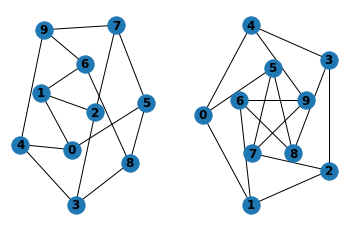

In [36]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

<Axes: >

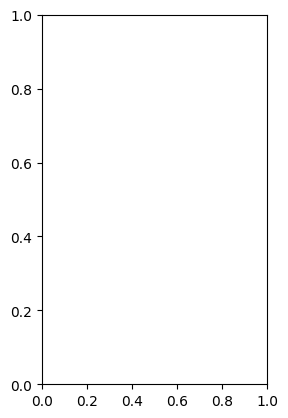

In [25]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
subax1

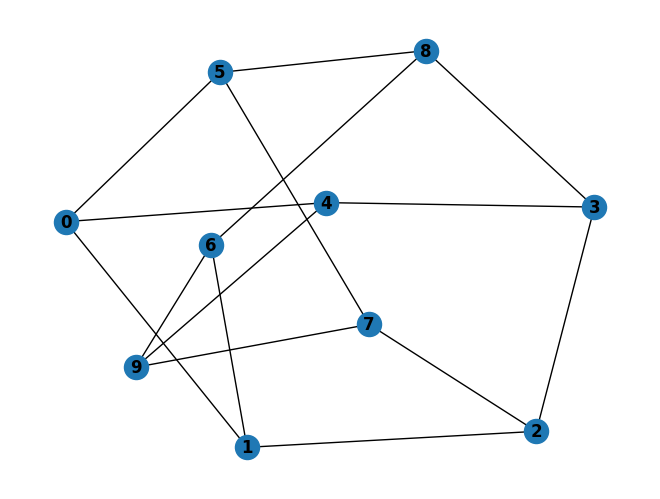

In [26]:
nx.draw(G, with_labels=True, font_weight='bold')

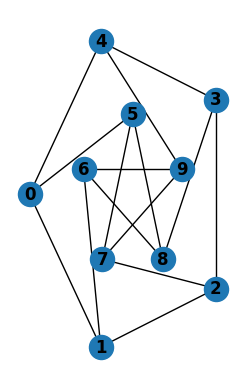

In [34]:
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

when drawing to an interactive display.  Note that you may need to issue a
Matplotlib

In [35]:
plt.show()

command if you are not using matplotlib in interactive mode.

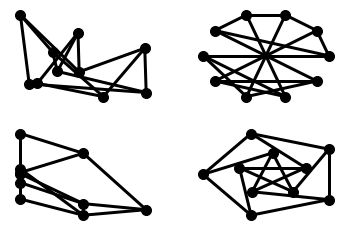

In [38]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

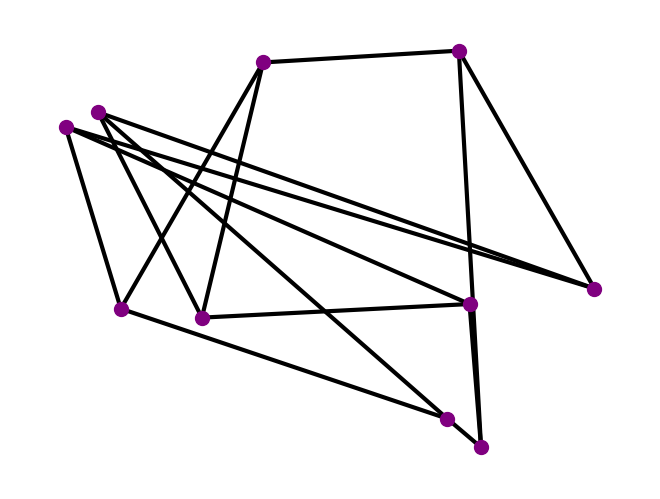

In [65]:
options = {
    'node_color': 'purple',
    'node_size': 100,
    'width': 3,
}
# subax1 = plt.subplot(221)
nx.draw_random(G, **options)

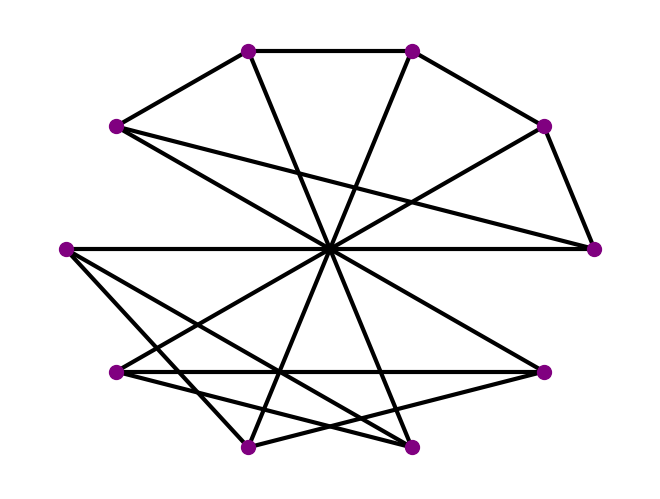

In [56]:
nx.draw_circular(G, **options)

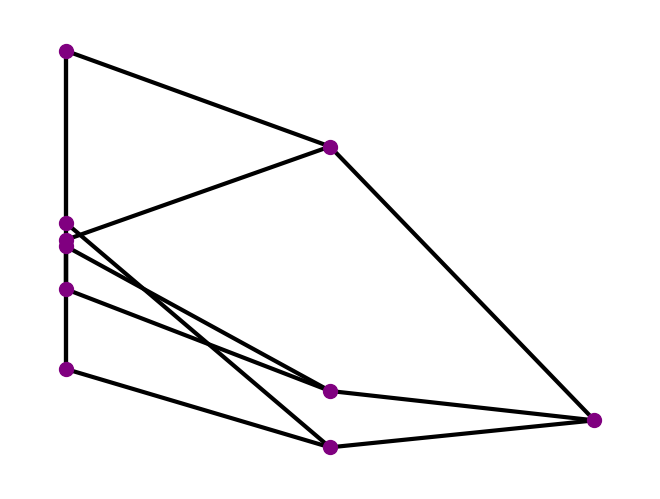

In [57]:
nx.draw_spectral(G, **options)

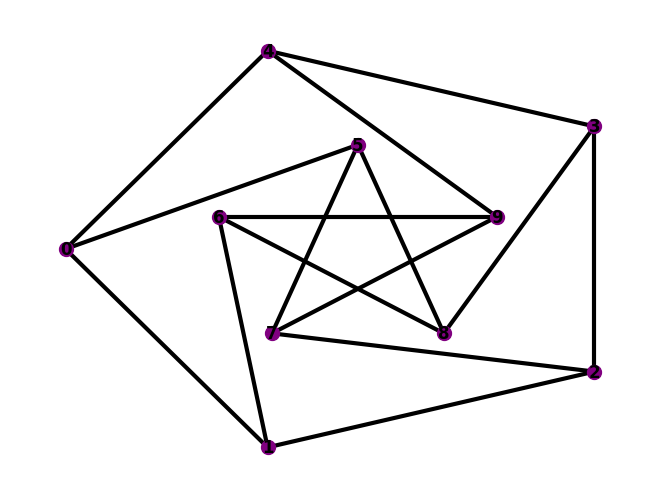

In [63]:
nx.draw_shell(G, nlist=[range(5,10), range(5)],with_labels=True,font_weight='bold', **options)

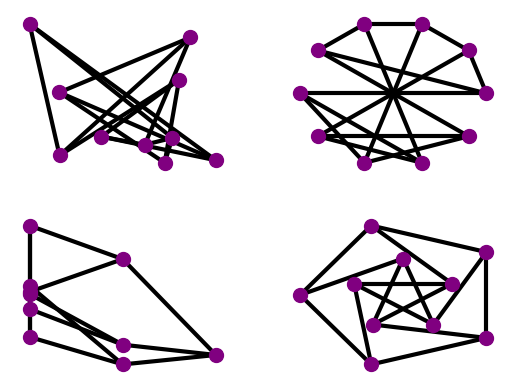

In [55]:
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

You can find additional options via `draw_networkx()` and
layouts via the `layout module`.
You can use multiple shells with `draw_shell()`.

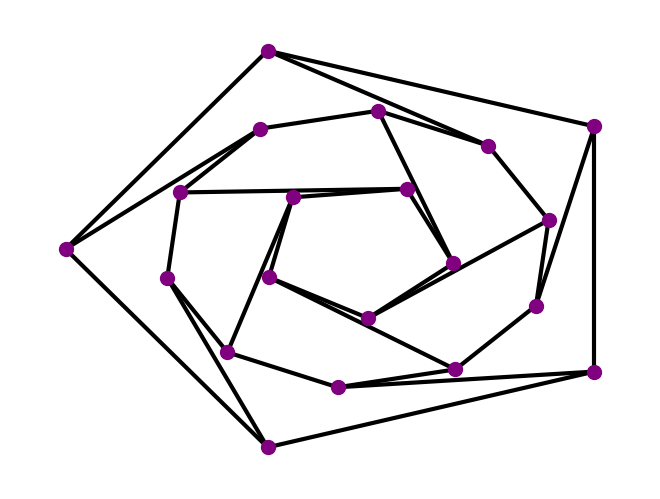

In [71]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

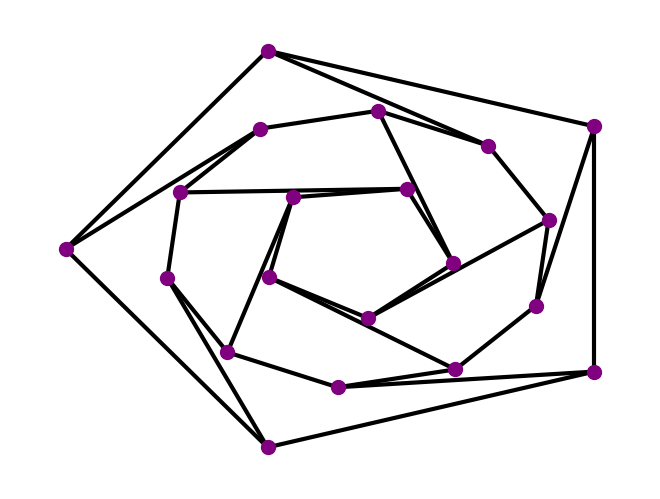

In [70]:
G = nx.dodecahedral_graph()
shells = [range(2, 7), [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

To save drawings to a file, use, for example

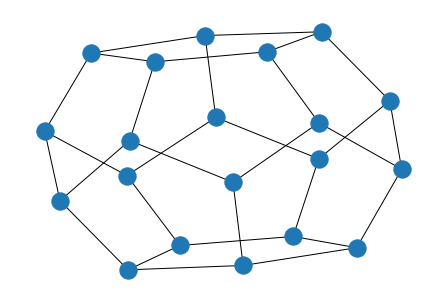

In [40]:
nx.draw(G)
plt.savefig("path.png")

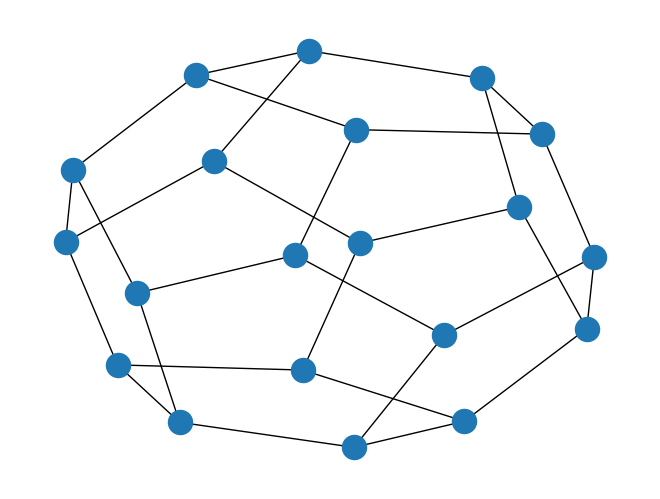

In [76]:
nx.draw(G)
plt.savefig("/home/teb/graph.png")

See Drawing for additional details.

# NX-Guides

If you are interested in learning more about NetworkX, graph theory and network analysis
then you should check out [nx-guides](https://networkx.org/nx-guides/index.html). There you can find tutorials,
real-world applications and in-depth examinations of graphs and network algorithms.
All the material is official and was developed and curated by the NetworkX community.